In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter

In [43]:
from sklearn.datasets._samples_generator import make_blobs
X, y = make_blobs(n_samples=200, centers=3, n_features=3, cluster_std=5, random_state=200)

In [44]:
df_1 = pd.DataFrame({'x1': X[:, 1], 'x2': X[:, 2], 'y': y, 'label': y})
df_2 = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'y': y, 'label': y})
df_3 = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 2], 'y': y, 'label': y})

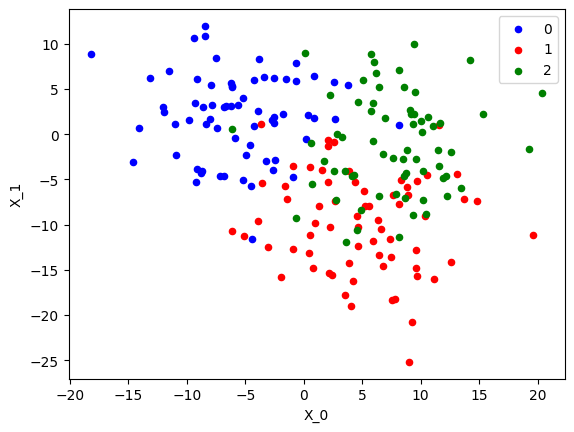

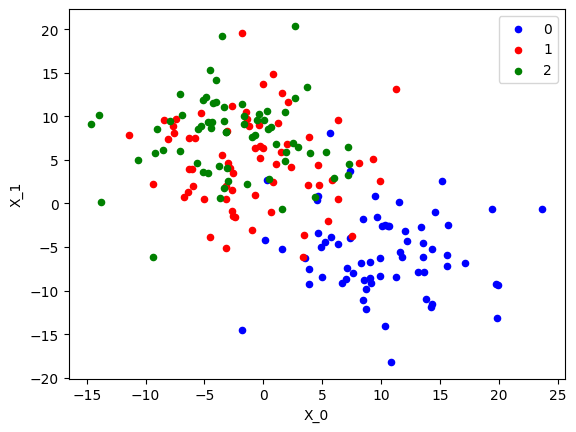

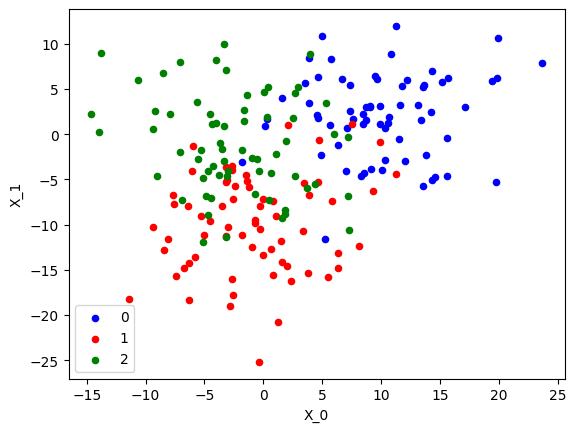

In [45]:
for df in [df_1,df_2,df_3]:
    
    colors = {0:'blue', 1:'red', 2:'green'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for k, v in grouped:
        v.plot(ax=ax, kind='scatter', x='x1', y='x2', label=k, color=colors[k])

    plt.xlabel('X_0')
    plt.ylabel('X_1')
    plt.show()

In [46]:
#Min-max noramlization
def min_max_norm(X):
    for i in range(X.shape[1]):
        x_min = np.min(X[:,i]) 
        x_max = np.max(X[:,i])

        X[:,i] = (X[:,i] - x_min) / (x_max - x_min)

    return X


In [47]:
#Normalize with min-max normalization
X =min_max_norm(X)

In [48]:
def nearest_neighbors(k, X, new_point):
    neighbors = []
    for i in range(len(X)):
        distance = np.sqrt(sum(np.square(X[i]-new_point)))
        neighbors.append((i, distance))
    neighbors = sorted(neighbors, key = lambda x: x[1])

    return neighbors[:k]

In [49]:
def classifier(neighbors, y):
    classes = [y[i[0]] for i in neighbors]
    return Counter(classes).most_common(1)[0][0]

In [57]:
new_points = np.array([
                        [-12,10,2],
                        [5,15,4],
                        [6,7,-1],
                        [2,-6,10]
                    ])

new_points = min_max_norm(new_points)

In [63]:
knn = nearest_neighbors(4, X, new_points[3])
classifier(knn, y)

np.int64(2)